In [1]:
%matplotlib inline

In [2]:
from numpy.polynomial import chebyshev as T

In [3]:
# Sawtooth function

t = np.linspace(-1, 1, 1000)
f = np.sign(np.sin(100*t / (2 - t)))

In [4]:
k_start = -10  # smallest k such that 2*k*pi / (100 + k*pi) > -1 
k_stop = 32

k_range = np.arange(k_start, k_stop)
f_corners = 2*k_range*np.pi / (100 + k_range*np.pi)

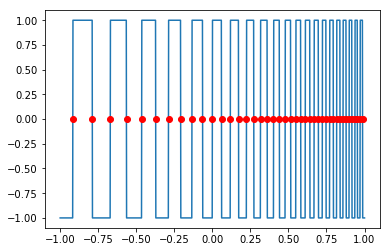

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.plot(t, f)
ax.plot(f_corners, np.zeros_like(f_corners), 'ro')


In [6]:
T10 = T.chebfit(t, f, 10)
T100 = T.chebfit(t, f, 100)
T1000 = T.chebfit(t, f, 1000)

/Users/jvankerschaver/.edm/envs/scikits-playground/lib/python3.6/site-packages/numpy/polynomial/chebyshev.py:1785: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


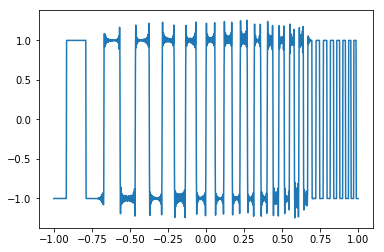

In [7]:
plt.plot(t, T.chebval(t, T1000))

In [8]:
delta = np.hstack([1 + f_corners[0], np.diff(f_corners)])
delta *= (-1) ** np.arange(1, len(delta) + 1)
delta = np.hstack([0, delta])

xp = np.hstack([-1, f_corners])
fp = np.cumsum(delta)

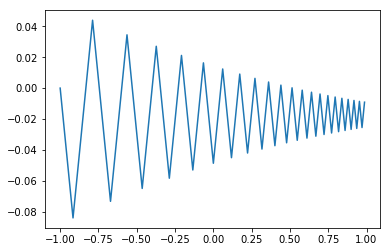

In [9]:
plt.plot(xp, fp)

In [10]:
s = np.interp(t, xp, fp)

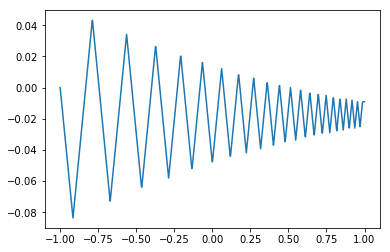

In [11]:
plt.plot(t, s)

In [12]:
T10 = T.chebfit(t, s, 10)
T100 = T.chebfit(t, s, 100)
T1000 = T.chebfit(t, s, 1000)

/Users/jvankerschaver/.edm/envs/scikits-playground/lib/python3.6/site-packages/numpy/polynomial/chebyshev.py:1785: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


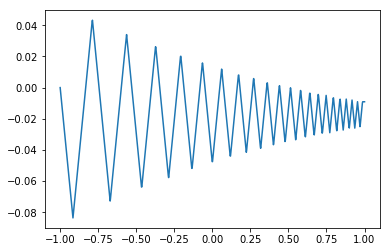

In [13]:
plt.plot(t, T.chebval(t, T1000))

In [14]:
%timeit T10000 = T.chebfit(t, s, 10000)

/Users/jvankerschaver/.edm/envs/scikits-playground/lib/python3.6/site-packages/numpy/polynomial/chebyshev.py:1785: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


742 ms ± 40.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/Users/jvankerschaver/.edm/envs/scikits-playground/lib/python3.6/site-packages/numpy/polynomial/chebyshev.py:1785: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


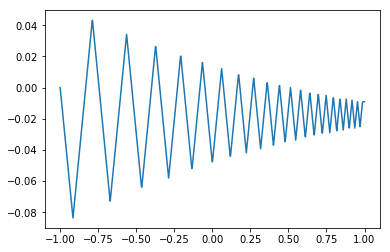

In [15]:
T10000 = T.chebfit(t, s, 10000)
plt.plot(t, T.chebval(t, T10000))

In [16]:
from ipywidgets import interactive

In [17]:
def plot_sawtooth(degree):
    coef = T.chebfit(t, s, degree)
    plt.plot(t, s)
    plt.plot(t, T.chebval(t, coef))
    plt.show()

In [18]:
interactive(plot_sawtooth, degree=(5, 100))

Widget Javascript not detected.  It may not be installed or enabled properly.
